# **DATA VISUALIZATION AND TEXT MINING PROJECT**


This project was carried out by: Alessia Marisa Antognini, Tommaso Biganzoli, Giovanni Caminiti and Alex Costa

# Dependencies import

In [1]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components
!pip install dash-bootstrap-components
!python -m spacy download en_core_web_lg
!pip install pyLDAvis
!pip install wordcloud
!pip install keras_utils
!pip install --upgrade transformers torch
!pip install pyLDAvis
!pip install plotly
!pip install flask-ngrok
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras_utils: filename=keras_utils-1.0.13-py3-n

In [2]:
import pandas as pd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import urllib
import string
from google.colab import drive

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pyLDAvis
import pyLDAvis.lda_model

from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Dropout, BatchNormalization,Bidirectional, GRU
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam

from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer
from transformers import BertForTokenClassification, BertTokenizerFast

import torch
from torch.utils.data import Dataset
import sys
import random
import pickle
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok

<ipython-input-2-17c02526eecd>:14: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-17c02526eecd>:15: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.rea

# 1. Exploratory Data Analysis

## 1.1 Data loading and cleaning

**Dataset loading**

We start by loading the dataset, which contains a collection of texts from different Wikipedia articles, that have already been splitted in tokens and each token was assigned an IOB tag. IOB, which stands for Inside-Outside-Beginning, is a common tagging format used in computational linguistics for tasks like chunking and named entity recognition (NER). In this case five tags were used:

1.   I-PER: person
2.   I-LOC: location
3.   I-ORG: organization
4.   I-MISC: miscellaneous, i.e. named entities that don't belong to the previous categories
5.   O: outside, i.e. not a named entity

In [3]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Text_Mining")
file_path = "https://raw.githubusercontent.com/nluninja/text-mining-dataviz-project-2024/refs/heads/main/Text%20Me%20Maybe/data/file1.ann"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [4]:
data = pd.read_csv(file_path, sep=' ', header=None, names=['Token', 'Tag'], quoting=csv.QUOTE_NONE)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Token,Tag
0,010,I-MISC
1,is,O
2,the,O
3,tenth,O
4,album,O
...,...,...
39147,a,O
39148,Russian,I-MISC
39149,singer,O
39150,.,O


**NA's and empty strings check**

In [5]:
# NA's
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Token,0
Tag,0


In [6]:
# Empty strings
blanks = []
for index,token,tag in data.itertuples():
  if token.isspace() or tag.isspace():
    blanks.append(index)
blanks

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

As shown in the outputs, there are neither NA nor empty strings in the dataset, indicating that the data is complete and does not contain any missing values.

**Raw Text**

In [7]:
# Raw text
punct = {'.', ',', ';',':','?', '!'}
text = ''
for i in data['Token']:
  if i in punct:
    text = text + i
  else:
    text = text + ' ' + i
text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' 010 is the tenth album from Japanese Punk Techno band The Mad Capsule Markets. This album proved to be more commercial and more techno-based than Osc-Dis, with heavily synthesized songs like Introduction 010 and Come. Founding member Kojima Minoru played guitar on Good Day, and Wardanceis cover of a song by UK post punk industrial band Killing Joke. XXX can of This had a different meaning, and most people did n\'t understand what the song was about. it was later explained that the song was about Cannabis ( \' can of this \' sounding like Cannabis when said faster ) it is uncertain if they were told to change the lyric like they did on P.O.P and HUMANITY. UK Edition came with the OSC-DIS video, and most of the tracks were re-engineered. -DOCSTART- The 139th was formed at Camp Howe, near Pittsburgh, on September 1, 1862. Frederick H. Collier was the first colonel. After burying the dead on the field of Second Battle of Bull Run, the regiment was attached to Howe \'s Brigade of Couch \'

The output above shows the complete text, obtained by joining all the tokens together. We can see that every time that a document starts it appears the token "-DOCSTART-".

**Documents and sentences split and remove punctuation**

We divide the text in documents and remove the "-DOCSTART-" tokens.

In [8]:
# Documents number

doc_id = 1
doc_ids = []
i = 0

for token in data['Token']:
    if token == '-DOCSTART-':
        doc_id += 1
        data.drop(index = i,inplace=True)
    else:
      doc_ids.append(doc_id)
    i += 1

data['Document_num'] = doc_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We also split the documents in sentences, using '.', '!' and '?' as delimiters and we remove the punctuation.

In [9]:
# Sentence number
sentence_id = 1
sentence_ids = []

for token in data['Token']:
    sentence_ids.append(sentence_id)
    if token in {'.', '!', '?'}:
        sentence_id += 1

data['Sentence_num'] = sentence_ids

# Remove punctuation
data = data[~data['Token'].isin(list(string.punctuation))].reset_index(drop=True) # from string library
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Token,Tag,Document_num,Sentence_num
0,010,I-MISC,1,1
1,is,O,1,1
2,the,O,1,1
3,tenth,O,1,1
4,album,O,1,1
...,...,...,...,...
33963,Gazmanov,I-PER,145,1660
33964,is,O,145,1660
33965,a,O,145,1660
33966,Russian,I-MISC,145,1660


**Sentence and document text**

Finally we add two columns to the dataset, which contain the texts of the sentence and the document at which the token belongs.

In [10]:
# Group by sentences
sentences = data.groupby('Sentence_num')['Token'].apply(lambda x: ' '.join(x)).reset_index()
data = data.merge(sentences, on='Sentence_num', how='left')
data.rename(columns={'Token_x': 'Token'}, inplace=True)
data.rename(columns={'Token_y': 'Sentence_text'}, inplace=True)


# Group by documents
documents = data.groupby('Document_num')['Token'].apply(lambda x: ' '.join(x)).reset_index()
data = data.merge(documents, on='Document_num', how='left')
data.rename(columns={'Token_x': 'Token'}, inplace=True)
data.rename(columns={'Token_y': 'Document_text'}, inplace=True)

data = data[['Token','Tag','Sentence_num','Sentence_text','Document_num','Document_text']]
data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Token,Tag,Sentence_num,Sentence_text,Document_num,Document_text
0,010,I-MISC,1,010 is the tenth album from Japanese Punk Tech...,1,010 is the tenth album from Japanese Punk Tech...
1,is,O,1,010 is the tenth album from Japanese Punk Tech...,1,010 is the tenth album from Japanese Punk Tech...
2,the,O,1,010 is the tenth album from Japanese Punk Tech...,1,010 is the tenth album from Japanese Punk Tech...
3,tenth,O,1,010 is the tenth album from Japanese Punk Tech...,1,010 is the tenth album from Japanese Punk Tech...
4,album,O,1,010 is the tenth album from Japanese Punk Tech...,1,010 is the tenth album from Japanese Punk Tech...
...,...,...,...,...,...,...
33963,Gazmanov,I-PER,1660,Oleg Mikhaylovich Gazmanov is a Russian singer,145,Oleg Mikhaylovich Gazmanov is a Russian singer
33964,is,O,1660,Oleg Mikhaylovich Gazmanov is a Russian singer,145,Oleg Mikhaylovich Gazmanov is a Russian singer
33965,a,O,1660,Oleg Mikhaylovich Gazmanov is a Russian singer,145,Oleg Mikhaylovich Gazmanov is a Russian singer
33966,Russian,I-MISC,1660,Oleg Mikhaylovich Gazmanov is a Russian singer,145,Oleg Mikhaylovich Gazmanov is a Russian singer


Now the dataset is ready for being used for our tasks.

## 1.2 Data Visualization

**Bar Chart**

We decided to implement two interactive dashboards to show the frequencies and the proportions of the tags within each sentence in the dataset. The bar chart allows us to visualize the frequency of different tags associated with tokens in a specific sentence, offering a clear representation of how often certain tags appear. The user can select the sentence to visualize and see which word correspond to each tag by moving the cursor on the bars.

In [11]:
tag_colors = {
    'O': 'rgb(0, 255, 0)',
    'I-PER': 'rgb(255, 0, 0)',
    'I-MISC': 'rgb(255, 165, 0)',
    'I-LOC': 'rgb(128, 0, 128)',
    'I-ORG': 'rgb(0, 128, 0)'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Token Tag Visualization"),

    dcc.Dropdown(
        id='sentence-dropdown',
        options=[{'label': sentence, 'value': sentence} for sentence in data['Sentence_num'].unique()],
        value=data['Sentence_num'].unique()[0],
        multi=False,
    ),

    dcc.Graph(id='token-tag-graph'),
])

@app.callback(
    Output('token-tag-graph', 'figure'),
    [Input('sentence-dropdown', 'value')]
)
def update_graph(selected_sentence):
    filtered_df = data[data['Sentence_num'] == selected_sentence]

    # Assicurati che ci siano dati da visualizzare
    if filtered_df.empty:
        return {
            'data': [],
            'layout': {'title': 'Nessun dato disponibile per la selezione'}
        }

    figure = {
        'data': [
            {
                'x': filtered_df['Tag'],
                'y': filtered_df['Token'],  # Qui devi correggere in base a quello che vuoi visualizzare
                'type': 'bar',
                'marker': {
                    'color': [tag_colors.get(tag, 'rgb(128, 128, 128)') for tag in filtered_df['Tag']]
                }
            },
        ],
        'layout': {
            'title': f'Sentence: {selected_sentence}',
            'xaxis': {
                'title': 'Tag',
                'categoryorder': 'category ascending',
                'automargin': True
            },
            'yaxis': {
                'title': 'Count of Tokens',  # Modifica qui se necessario
                'visible': True,
            }
        }
    }

    return figure

if __name__ == '__main__':
    app.run_server(debug=True, port=4783)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/dash/dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0



<IPython.core.display.Javascript object>

**Pie Chart**

The second dashboard is similar to the previous one, however the pie chart focuses on the proportions of each tag type in the sentence.

In [13]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Tag Distribution Visualization"),
    dcc.Dropdown(
        id='sentence-dropdown',
        options=[{'label': sentence, 'value': sentence} for sentence in data['Sentence_num'].unique()],
        value=data['Sentence_num'].unique()[0],
        multi=False,
    ),
    dcc.Graph(id='tag-distribution-pie-chart'),
])

@app.callback(
    Output('tag-distribution-pie-chart', 'figure'),
    [Input('sentence-dropdown', 'value')]
)
def update_tag_distribution_pie_chart(selected_sentence):
    filtered_df = data[data['Sentence_num'] == selected_sentence]

    tag_counts = filtered_df['Tag'].value_counts()

    # Verifica se tag_counts è vuoto
    if tag_counts.empty:
        return {
            'data': [],
            'layout': {
                'title': 'Nessun dato disponibile per la selezione'
            }
        }

    figure = px.pie(tag_counts, names=tag_counts.index, values=tag_counts.values,
                    title='Tag Distribution')

    return figure

if __name__ == '__main__':
    app.run_server(debug=True, port=5739)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/dash/dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0



<IPython.core.display.Javascript object>

**Word Cloud**

We created a word cloud to visualize the most frequent words in the entire text,excluding irrelevant words such as stopwords.

In [20]:
stopwords = set(STOPWORDS) # any redundant stopword in the wordcloud package
stopwords.add("DOCSTART")
stopwords.add("S")

# instantiate a word cloud object
data_wc = WordCloud(
    background_color='white',
    stopwords=stopwords
)
data_wc.generate(text) # generate the wordcloud on our raw text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



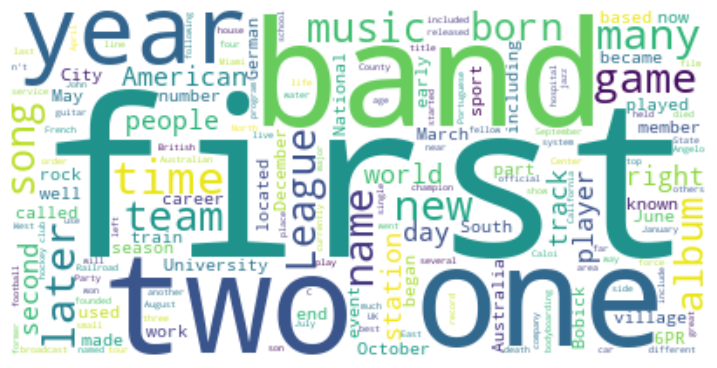

In [21]:
fig = plt.figure(figsize=(9, 12))
plt.imshow(data_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud highlights a variety of frequently occurring terms, which, at first glance, seem unrelated, covering topics such as time, sports, and music. However, despite this apparent diversity, we can try to discover the most relevant topics, i.e. perform topic modeling, using LDA.

## 1.3 LDA

The Latent Dirichlet Allocation (LDA) helps us uncover groups of words that frequently co-occur, representing recurring themes in the dataset. We apply the LDA to the collection of documents, and not sentences, because it will have access to the broader context provided by the entire document instead of a single sentence. The topics identified will tend to be more globally coherent, representing themes that emerge across whole documents.

In [16]:
# Build the vocabulary and the dtm
cv = CountVectorizer(max_df=0.99, min_df=0.01, stop_words='english')
X = cv.fit_transform(data['Document_text'].drop_duplicates()) #dtm

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=6, random_state=777)   # trying to figure out 6 different topics
lda_model.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=6, random_state=777)

In [17]:
for index, topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index + 1}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



THE TOP 15 WORDS FOR TOPIC #1
['university', 'march', 'later', 'years', 'april', 'sport', '1945', 'american', 'german', 'ben', '1943', 'world', 'june', 'air', 'player']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'time', 'video', '30', 'called', 'born', 'league', 'played', 'season', '2007', 'club', 'team', 'album', 'hockey', 'band']


THE TOP 15 WORDS FOR TOPIC #3
['station', 'south', 'time', 'west', 'reading', 'gauge', 'small', 'railway', 'track', 'village', 'later', 'cars', 'city', 'railroad', 'train']


THE TOP 15 WORDS FOR TOPIC #4
['band', 'started', 'design', 'national', 'anthem', 'jazz', 'born', 'album', 'world', 'station', 'song', 'broadcast', 'british', 'french', 'music']


THE TOP 15 WORDS FOR TOPIC #5
['court', 'convention', 'center', 'water', 'city', 'located', 'park', 'washington', 'village', 'area', 'university', 'day', 'hospital', 'state', 'county']


THE TOP 15 WORDS FOR TOPIC #6
['liberal', 'defamation', 'army', 'special', 'later', 'years', 'australian', 'beach', 'rights

We have decided to search for 6 topics, and the output from the LDA model reveals six sets of keywords that we have to interpret in order to give names to the topics. Here’s a refined interpretation of each topic:



1.   **Topic 1**: appears to focus on historical sports-related content, with terms like "university," "player," "air," and specific years like 1945 and 1943. This suggests a theme related to sports events or teams, possibly with a historical or academic context.

2.   **Topic 2** is centered around music and entertainment, with keywords such as "album," "band," "hockey," "season," and "club." This topic could indicate content related to the intersection of music, sports, or popular culture.

3. **Topic 3** highlights transportation, particularly railways, as seen with words like "station," "railroad," "train," and "track." This suggests a theme focused on travel, infrastructure, or perhaps the history of railways.

4. **Topic 4** emphasizes music, specifically genres like jazz, with terms such as "band," "broadcast," "anthem," and "song." It seems to be related to music performances, events, or broadcasting, particularly in a global or cultural context.

5. **Topic 5** suggests a focus on locations and facilities, with terms like "court," "convention," "city," and "hospital." This could point to content related to public spaces, events, or urban infrastructure.

6. **Topic 6** revolves around political and social issues, with keywords like "liberal," "defamation," "army," and "rights." This topic likely represents themes tied to political movements, social rights, or legal matters.

Although the LDA model has successfully divided the dataset into six topics, the effectiveness of this segmentation is somewhat limited. The themes of the topics, while consisting of identifiable keywords, are not always immediately clear. We believe this lack of coherence can be attributed to the fact that the documents in the dataset are largely independent in terms of the topics they cover. As a result, the model struggles to identify distinct and meaningful topics, leading to some ambiguity in the output.

**Bubble Plot LDA**

A bubble plot of the LDA allows us to quickly explore the main themes emerging from the dataset, observing how they are distributed and how they relate to one another. Each bubble in the plot represents a topic identified by the model, and its size indicates the importance or frequency of that theme within the documents. The position of the bubbles also helps us understand the similarity or distance between different topics.

In [18]:
import pyLDAvis
from pyLDAvis import prepare
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Building the dictionary
cv = CountVectorizer(max_df=0.99, min_df=0.01, stop_words='english')
X = cv.fit_transform(data['Document_text'].drop_duplicates())  # Usa il tuo dataset "data"

# LDA Model
lda_model = LatentDirichletAllocation(n_components=6, random_state=777)
lda_model.fit(X)

# Prepare data for PyLDAvis
lda_data = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,
    doc_topic_dists=lda_model.transform(X),
    doc_lengths=X.sum(axis=1).A1,
    vocab=cv.get_feature_names_out(),
    term_frequency=X.toarray().sum(axis=0),
    sort_topics=False
)

# Save and show the dashboard
pyLDAvis.save_html(lda_data, 'lda_dashboard.html')
pyLDAvis.display(lda_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The left panel, the Intertopic Distance Map, shows each topic as a bubble, with size indicating prevalence and distance representing semantic similarity (closer bubbles share more terms). The right panel displays the most relevant terms across all topics, with blue bars for overall term frequency and red bars (when interacting) showing frequency within a selected topic. The relevance slider adjusts term rankings based on their importance within a topic versus their overall frequency, offering flexibility in analyzing unique and frequent terms per topic.

# 2. Neural Network approach

In this section, we will implement different neural network models for named entity recognition: a Feed Forward neural network, a LSTM model and a GRU model. But first, we preprocess the data.

##2.1 Data Preparation

**Train, Validation and Test split**

We drop from the dataset all the columns apart from the texts of the sentences, and we add a new coulmn representing the list of all the labels of that sentence.

In [ ]:
wiki = data[['Token', 'Tag', 'Sentence_num', 'Sentence_text']].copy() # create a subset of data
wiki['word_labels'] = (
    wiki.groupby('Sentence_num')['Tag']
    .transform(lambda x: ','.join(x))
)
wiki = wiki[['Sentence_text', 'word_labels']].drop_duplicates().reset_index(drop=True)
wiki.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Sentence_text,word_labels
0,010 is the tenth album from Japanese Punk Tech...,"I-MISC,O,O,O,O,O,I-MISC,O,O,O,I-ORG,I-ORG,I-OR..."
1,This album proved to be more commercial and mo...,"O,O,O,O,O,O,O,O,O,O,O,I-MISC,O,O,O,O,O,I-MISC,..."
2,Founding member Kojima Minoru played guitar on...,"O,O,I-PER,I-PER,O,O,O,I-MISC,I-MISC,O,I-MISC,O..."
3,XXX can of This had a different meaning and mo...,"I-MISC,I-MISC,I-MISC,I-MISC,O,O,O,O,O,O,O,O,O,..."
4,it was later explained that the song was about...,"O,O,O,O,O,O,O,O,O,I-MISC,O,O,O,O,O,I-MISC,O,O,..."


We divide our dataset into a training set (72%), a test set (20%) and a validation set (8%). We will use the train set to train our models, the validation set to monitor the model's performance during training, preventing overfitting or underfitting, and the test set to evaluate the models' final performance on unseen data.
We used the function drom this link https://scikit-learn.org/dev/modules/cross_validation.html#stratification to homogeously split the number of tags between the three sets. This is because otherwise it is easy to obtain a set with zero of one of the labels since most of them are "O". And, for example, if we have zero "I-MISC" in the training set, the model cannot learn to classify a token as "I-MISC".

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Function to calculate the dominant class in each sequence of labels
def get_dominant_class(labels):
    labels = labels.split(',')
    label_counts = pd.Series(labels).value_counts()
    return label_counts.idxmax()

# Create a new column with the dominant class
wiki['dominant_class'] = wiki['word_labels'].apply(get_dominant_class)

# Configure StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=77) # only one division of the dataset

# Perform the first split to separate Train+Val and Test
for train_val_idx, test_idx in sss.split(wiki, wiki['dominant_class']): # the output of sss.split(wiki, wiki['dominant_class']) is just an array of indexes to be included in the test or train test
    train_val_set = wiki.iloc[train_val_idx]
    test_set = wiki.iloc[test_idx]

# Separate X (Sentence_text) e y (word_labels) for test set
X_test = test_set['Sentence_text']
y_test = test_set['word_labels']

# Perform another split to separate Train and Validation
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=77)

for train_idx, val_idx in sss_val.split(train_val_set, train_val_set['dominant_class']):
    train_set = train_val_set.iloc[train_idx]
    val_set = train_val_set.iloc[val_idx]

# Separate X (Sentence_text) e y (word_labels) training and validation sets
X_train = train_set['Sentence_text']
y_train = train_set['word_labels']

X_val = val_set['Sentence_text']
y_val = val_set['word_labels']

# Checking set sizes
print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Shows the distribution of classes in the sets to confirm stratification
print("Distribuzione delle classi nei set:")
print("Train:", train_set['dominant_class'].value_counts(normalize=True))
print("Validation:", val_set['dominant_class'].value_counts(normalize=True))
print("Test:", test_set['dominant_class'].value_counts(normalize=True))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Train set: 1190 samples
Validation set: 133 samples
Test set: 331 samples
Distribuzione delle classi nei set:
Train: dominant_class
O         0.969748
I-ORG     0.010924
I-PER     0.008403
I-MISC    0.007563
I-LOC     0.003361
Name: proportion, dtype: float64
Validation: dominant_class
O         0.969925
I-MISC    0.007519
I-ORG     0.007519
I-PER     0.007519
I-LOC     0.007519
Name: proportion, dtype: float64
Test: dominant_class
O         0.969789
I-MISC    0.009063
I-PER     0.009063
I-ORG     0.009063
I-LOC     0.003021
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



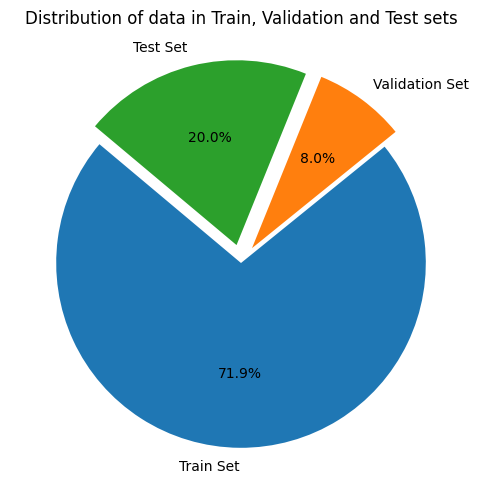

In [ ]:
# Pie chart of dataset split
sizes = [len(train_set), len(val_set), len(test_set)]
labels = ['Train Set', 'Validation Set', 'Test Set']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = [0, 0.1, 0.1] # to move the 2nd and the 3rd slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of data in Train, Validation and Test sets')
plt.show()

In [ ]:
# Resetting the indeces
x_train=X_train.reset_index(drop=True)
x_test=X_test.reset_index(drop=True)
x_val=X_val.reset_index(drop=True)

y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Tokenization**

We split the sentences and their corresponding labels into individual words and tags.

In [ ]:
# Dictionary for mapping labels
labels_to_ids = {k: v for v, k in enumerate(data.Tag.unique())}
ids_to_labels = {v: k for v, k in enumerate(data.Tag.unique())}
labels_to_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'I-MISC': 0, 'O': 1, 'I-ORG': 2, 'I-PER': 3, 'I-LOC': 4}

In [ ]:
# Function to split tokens and tags
def splitting(x, y):
    x_list = [sentence.split(" ") for sentence in x]
    y_list = [tags.split(",") for tags in y]

    return x_list, y_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
x_train_l,y_train_l=splitting(x_train,y_train)
x_test_l,y_test_l=splitting(x_test,y_test)
x_val_l,y_val_l=splitting(x_val,y_val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Then, we apply tokenization with Keras' Tokenizer to create a vocabulary that assigns an integer ID to each unique word in the training, validation, and test sets. This converts the text data into a numerical format suitable for the models.

In [ ]:
# Tokenization
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(x_train_l+x_val_l+x_test_l)

# Conversion to sequences
train_input_sequences = text_tokenizer.texts_to_sequences(x_train_l)
test_input_sequences = text_tokenizer.texts_to_sequences(x_test_l)
val_input_sequences = text_tokenizer.texts_to_sequences(x_val_l)

# Conversion of labels (NER) into numerical sequences
train_label_sequences = [[labels_to_ids[tag] for tag in sentence] for sentence in y_train_l]
test_label_sequences = [[labels_to_ids[tag] for tag in sentence] for sentence in y_test_l]
val_label_sequences = [[labels_to_ids[tag] for tag in sentence] for sentence in y_val_l]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Saving the Tokenizer
tokenizer_path = '/content/drive/MyDrive/Text_Mining/tokenizer.pkl'
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(text_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Tokenizer salvato correttamente in: {tokenizer_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Tokenizer salvato correttamente in: /content/drive/MyDrive/Text_Mining/tokenizer.pkl


In [ ]:
# Example: Tokens and ID of a sentence
for i in test_input_sequences[7]:
  print(f' {i}: {text_tokenizer.index_word[i]}')

 30: this
 6839: boosted
 111: 6pr
 15: 's
 6840: ratings
 6: to
 5: a
 6841: consistent
 142: number
 36: two
 10: with
 5: a
 142: number
 32: one
 603: position
 9: on
 148: several
 6842: occasions


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In the output above we see, for example, the tokens and the corresponding integer IDs of the 7th sentence.

In [ ]:
# dimension of the vocabulary
vocabulary_size=len(text_tokenizer.word_counts)
print(vocabulary_size)

7705


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The total number of unique words in the tokenizer's vocabulary is 7705. We can take a look at all the tokens in the vocabulary and the corresponding ID:

In [ ]:
text_tokenizer.word_index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'the': 1,
 'of': 2,
 'in': 3,
 'and': 4,
 'a': 5,
 'to': 6,
 'was': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'for': 11,
 'as': 12,
 'he': 13,
 'by': 14,
 "'s": 15,
 'his': 16,
 'at': 17,
 'from': 18,
 'it': 19,
 'that': 20,
 'were': 21,
 'an': 22,
 'which': 23,
 'also': 24,
 'has': 25,
 'their': 26,
 'they': 27,
 'its': 28,
 'who': 29,
 'this': 30,
 'after': 31,
 'one': 32,
 'first': 33,
 'but': 34,
 'are': 35,
 'two': 36,
 'had': 37,
 'band': 38,
 'be': 39,
 'or': 40,
 'not': 41,
 'later': 42,
 'other': 43,
 'all': 44,
 'league': 45,
 'have': 46,
 'new': 47,
 'many': 48,
 'when': 49,
 'she': 50,
 'her': 51,
 'would': 52,
 'during': 53,
 'world': 54,
 '--': 55,
 'over': 56,
 'been': 57,
 'out': 58,
 'music': 59,
 'there': 60,
 'more': 61,
 'name': 62,
 'player': 63,
 'years': 64,
 '2007': 65,
 'born': 66,
 'city': 67,
 'album': 68,
 'people': 69,
 'train': 70,
 'where': 71,
 'him': 72,
 'into': 73,
 'made': 74,
 '1': 75,
 'university': 76,
 'some': 77,
 'station': 78,
 'time': 79,
 'natio

In [ ]:
# Example: Tags and ID of a sentence
for i in train_label_sequences[1]:
  print(f'{i}: {ids_to_labels[i]}')

1: O
1: O
1: O
1: O
1: O
4: I-LOC
3: I-PER
3: I-PER
1: O
1: O
1: O
1: O
1: O
1: O
1: O
1: O
3: I-PER
3: I-PER
1: O
3: I-PER
3: I-PER


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The output above shows the tags and the corresponding ID of the second sentence in the training set.

**Padding and one-hot encoding**

We decided to apply the padding technique to our sequences with the goal of achieving sequences of equal length. If a sequence is shorter than the designeted length, we add as many zeros at the end as needed to reach that length. If, on the other hand, the starting length is greater, the sequence is truncated at the end. Since the maximum length of our sequences is 109 and 75% of the sequences have length less than or equal to 25, we decided to set the length after padding to 100. Padding is essential to allow the neural network models to process the inputs consistently and efficiently.


In [ ]:
# Sequence length percentiles
sequence_len = [len(s) for s in train_input_sequences]
percentiles = [(str(p) + '%', np.percentile(sequence_len, p)) for p in [25,50,75,100]]
for p, value in percentiles:
    print(f'Percentile {p}: {value}')

Percentile 25%: 12.0
Percentile 50%: 18.0
Percentile 75%: 25.0
Percentile 100%: 109.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



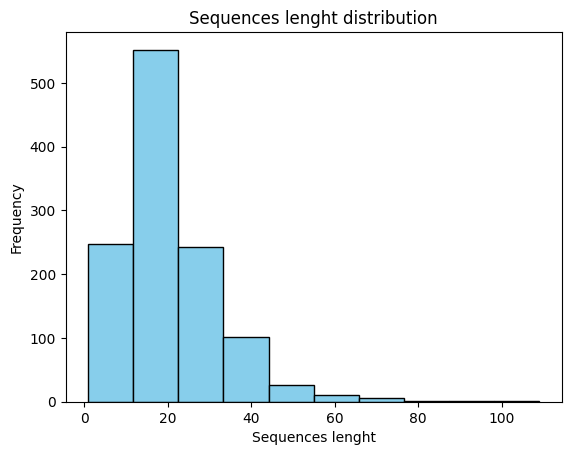

In [ ]:
# Histogram of sequence length
plt.hist(sequence_len, bins=10, color='skyblue', edgecolor='black')
plt.title('Sequences lenght distribution')
plt.xlabel('Sequences lenght')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Padding
max_sequence_len = 100

x_train = pad_sequences(train_input_sequences, maxlen=max_sequence_len, padding='post', truncating='post')
x_test = pad_sequences(test_input_sequences, maxlen=max_sequence_len, padding='post', truncating='post')
x_val = pad_sequences(val_input_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

y_train = pad_sequences(train_label_sequences, maxlen=max_sequence_len, value=labels_to_ids['O'], padding='post', truncating='post') # labels_to_ids['O'] serves as a fill value, like 0 in x
y_test = pad_sequences(test_label_sequences, maxlen=max_sequence_len, value=labels_to_ids['O'], padding='post', truncating='post')
y_val = pad_sequences(val_label_sequences, maxlen=max_sequence_len, value=labels_to_ids['O'], padding='post', truncating='post')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Transform 0 into 'PAD'
text_tokenizer.index_word[0] = '_PAD_'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(x_train[4])

[  17    1   79   16  333   37  711 1443    6    5 2031 1072 1444    4
  297   41 2032 3296    6 3297   16  268  141   13  298  455  529  269
    6    1  456    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The output above shows the IDs of the tokens in the fifth sentence in the training set. After the sentence is finished, the remaining elements up to 100 are filled with zeroes. Next, we apply one-hot encoding to the target labels to convert them into a binary vector format, where each class is represented by a vector with a 1 in the position corresponding to the class label and 0s in all other positions.

In [ ]:
# one hot encoding
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)

y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



##2.2 GLOVE

**Embedding with Glove**

Word embeddings are Vector Space Models (VSMs)
that transform words into vectors of real numbers, where words with similar meanings are represented by similar vectors. One of the word embedding models is **GloVe** (Global Vectors for Word Representation), that constructs word embeddings based on global co-occurrence statistics of words in a text corpus.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



--2024-11-26 14:24:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-26 14:24:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-26 14:24:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

After loading a pre-trained GloVe, we create an embedding matrix by mapping each word in our tokenizer’s vocabulary to its corresponding GloVe vector. If a word doesn’t have a match, it gets a vector of zeros.

In [ ]:
# Load the GloVe embedding
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.array(values[1:], dtype='float32')
        embedding_index[word] = coefficients

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(text_tokenizer.word_index) + 1, embedding_dim))
for word, i in text_tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Embedding matrix shape: (7706, 100)


The embedding matrix has shape (7706, 100): every row is a word in the vocabulary, and each word is represented by a vector of 100 real numbers. Then we can evaluate how well our vocabulary is represented by the pre-trained GloVe embeddings:


In [ ]:
found_count = 0
not_found_count = 0

for word, i in text_tokenizer.word_index.items():
    if embedding_index.get(word) is not None:
        found_count += 1
    else:
        not_found_count += 1

print(f"Found words in the embedding: {found_count}")
print(f"Words not found embedding: {not_found_count}")
print(f"Percentage of found words: {found_count / len(text_tokenizer.word_index) * 100:.2f}%")

Found words in the embedding: 7205
Words not found embedding: 500
Percentage of found words: 93.51%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The results show that 93.51% of the words in our vocabulary are covered by GloVe embeddings, with only 500 words (approximately 6.49%) not being found. This high coverage indicates that Glove is effectively capturing most of the linguistic features in our data.

**Visualizing Glove**

We now visualize the semantic similarities among the tokens of the first 5 sentences by exploiting Glove word embedding. Given that the embedding dimension is 100, we perform also a dimensionality reduction that allows us to represent it in a 2 dimensional plot.

In [ ]:
# First five sentences
first_five_sent = wiki['Sentence_text'][0:5]

# Split in tokens
first_five_toks = []
for i in range(len(first_five_sent)):
  sentence = first_five_sent[i]
  splitted_sentence = sentence.split(" ")
  first_five_toks.append(splitted_sentence)

# Merge all the tokens in a single list
filtered_tokens = []
for i in range(len(first_five_toks)):
  filtered_tokens = filtered_tokens+first_five_toks[i]
filtered_word_index = {word: i for i, word in enumerate(filtered_tokens)}
filtered_word_index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'010': 32,
 'is': 97,
 'the': 105,
 'tenth': 3,
 'album': 15,
 'from': 5,
 'Japanese': 6,
 'Punk': 7,
 'Techno': 8,
 'band': 55,
 'The': 10,
 'Mad': 11,
 'Capsule': 12,
 'Markets': 13,
 'This': 61,
 'proved': 16,
 'to': 103,
 'be': 18,
 'more': 22,
 'commercial': 20,
 'and': 112,
 'techno-based': 23,
 'than': 24,
 'Osc-Dis': 25,
 'with': 26,
 'heavily': 27,
 'synthesized': 28,
 'songs': 29,
 'like': 107,
 'Introduction': 31,
 'Come': 34,
 'Founding': 35,
 'member': 36,
 'Kojima': 37,
 'Minoru': 38,
 'played': 39,
 'guitar': 40,
 'on': 110,
 'Good': 42,
 'Day': 43,
 'Wardanceis': 45,
 'cover': 46,
 'of': 88,
 'a': 63,
 'song': 83,
 'by': 50,
 'UK': 51,
 'post': 52,
 'punk': 53,
 'industrial': 54,
 'Killing': 56,
 'Joke': 57,
 'XXX': 58,
 'can': 87,
 'had': 62,
 'different': 64,
 'meaning': 65,
 'most': 67,
 'people': 68,
 'did': 109,
 "n't": 70,
 'understand': 71,
 'what': 72,
 'was': 84,
 'about': 85,
 'it': 96,
 'later': 79,
 'explained': 80,
 'that': 81,
 'Cannabis': 92,
 'this': 89

In [ ]:
# list of indexes divided according to sentences
first_five_idx = []
for i in range(len(first_five_toks)):
  tokens=first_five_toks[i]
  idx=[]
  for tok in tokens:
    token=tok.lower() # tokenizer lowerized automatically so in order to search a token I have to lowerize it
    idx.append(text_tokenizer.word_index[token])
  first_five_idx.append(idx)

# merge all the indexes in a list
all_index=[]
for i in range(len(first_five_idx)):
  all_index=all_index+first_five_idx[i]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Filter the embedding matrix in order to consider only the embedding of the words in the sentences
filtered_embedding_matrix = embedding_matrix[[index for index in all_index]]

# Cumulative lengths
cumulative_lengths = [0] + [len(sublist) for sublist in first_five_idx]
cumulative_lengths = [sum(cumulative_lengths[:i+1]) for i in range(len(cumulative_lengths))]

# Reduce the dimensionality of the embedding matrix in order to plot it in 2 dimensions
pca = PCA(n_components=2) # dimension reduction algorythm to 2D
embedding_pca = pca.fit_transform(filtered_embedding_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



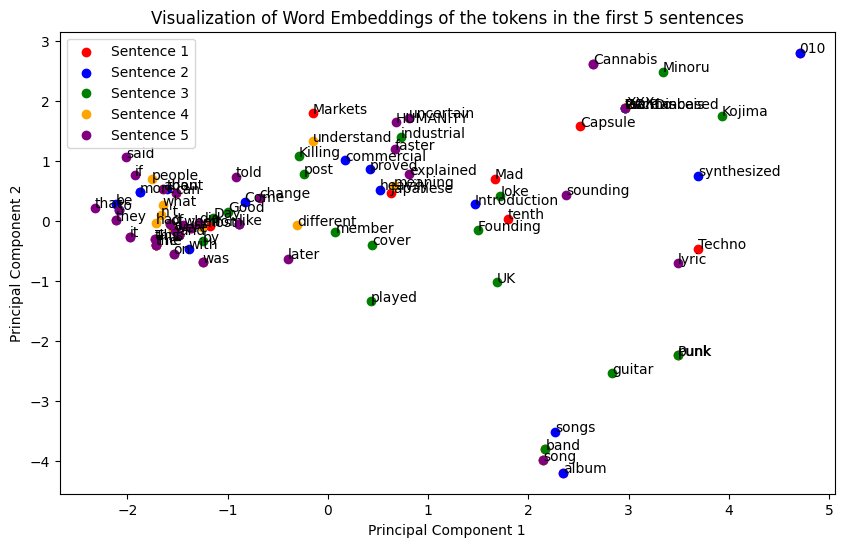

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
color_list = ['red', 'blue', 'green','orange','purple']

for idx, (start, end) in enumerate(zip(cumulative_lengths[:-1], cumulative_lengths[1:])):
  plt.scatter(embedding_pca[list(range(start,end)),0],embedding_pca[list(range(start,end)),1],label=f'List {idx+1}', color=color_list[idx])

plt.title('Visualization of Word Embeddings of the tokens in the first 5 sentences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Labels tokens
for word, i in filtered_word_index.items():
    plt.annotate(word, xy=(embedding_pca[i, 0], embedding_pca[i, 1]))

plt.legend([f'Sentence {idx + 1}' for idx in range(len(color_list))])

plt.show()


We con observe from the plot that words that are semantically close are represented as close points, like (songs, song, band, album, guitar) or (cannabis, capsule, synthesized).

##2.3 Feed Forward NN

The first model that we use in our project is a simple Feed Forward neural network. The architecture of this model is a sequential neural network with the following layers:

*   embedding layer: we use the Glove output obtained before
*   dropout layer: it prevents potential overfitting issues
*   three fully connected layers with ReLU activation functions and another dropout between the first 2
*   a final layer that classify the token into of the five classes using a softmax activation function

We have used the categorical cross-entropy as loss function and Adam as optimizer. As hyperparameteres we have chosen to set a batch size of 16 and 10 epochs with an early stopping based on the validation loss, in order to prevent eventual overfitting issues.

Since we have a strong imbalance in the label distribution (see above), we tried to assign weights to the loss function using the compute_class_weight function from sklearn. This is because, when you have a dataset where some classes are much more represented than others, the model tends to "favor" the majority classes as it can achieve good overall accuracy by ignoring the minority classes. Weights have been assigned in such a way that less represented classes would have a higher weight, while more represented classes would have a lower weight. Unfortunately, this approach didn't bring any improvement to the model performances, thus we proceded without weigths. The code of the attempt is however visible below as a comment.

**Model configuration and fitting**

In [ ]:
# Set the seed
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Configuration for GloVe
USE_GLOVE = True
glove_matrix = None
if USE_GLOVE:
    embedding_dim = 100
    glove_matrix = embedding_matrix

# Model structure configuration
model = Sequential()

# Embedding layer with Glove
model.add(Embedding(input_dim=len(text_tokenizer.word_index) + 1,  # Vocabulary dimension
                    output_dim=100,  # embedding dimension
                    weights=[glove_matrix],  # weights from GloVe
                    mask_zero=True,  # ignore padding tokens (0)
                    input_length=x_train.shape[1],  # sequences length
                    trainable=False))

# Intermediate layers
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

# Final classification layer
model.add(Dense(5, activation='softmax'))

# Model compiler
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, 100))
model.summary()

# Callback per Early Stopping
early_stopping_callback = EarlyStopping(monitor="val_loss",
                                        min_delta=0.01,
                                        patience=3,
                                        verbose=True,
                                        mode="auto",
                                        restore_best_weights=True)

# Fit the model on the training set using validation set for early stopping
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=16,
    callbacks=[early_stopping_callback]
)

# Save model on drive
model.save('/content/drive/MyDrive/Text_Mining/Feed_Forward_model.h5')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         770,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100, 800)            │          80,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 800)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100, 200)            │         160,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100, 100)            │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100, 5)              │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,032,205 (3.94 MB)

 Trainable params: 261,605 (1021.89 KB)

 Non-trainable params: 770,600 (2.94 MB)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8936 - loss: 0.7913 - val_accuracy: 0.9729 - val_loss: 0.4093
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.8890 - loss: 0.4652 - val_accuracy: 0.9754 - val_loss: 0.3607
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.8827 - loss: 0.4185 - val_accuracy: 0.9771 - val_loss: 0.3492
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.8613 - loss: 0.3936 - val_accuracy: 0.9777 - val_loss: 0.3412
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.8369 - loss: 0.3728 - val_accuracy: 0.9780 - val_loss: 0.3430
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8363 - loss: 0.3634 - val_accuracy: 0.9781 - val_loss: 0.3340
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.8502 - loss: 0.3433 - val_accuracy: 0.9794 - val_loss: 0.3324
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.8844 - loss: 0.3364 - val_accuracy: 0.

In [ ]:
# Function for plotting
def plot_history(history, metric1='accuracy', metric2='val_accuracy'):
    # Extract training and validation metrics
    acc = history.history.get(metric1, [])
    val_acc = history.history.get(metric2, [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(14, 6))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b-', label='Training', linewidth=2, marker='o')
    plt.plot(x, val_acc, 'r--', label='Validation', linewidth=2, marker='x')
    plt.xlabel('Epochs')
    plt.ylabel(metric1.capitalize())
    plt.title(f'Training and Validation {metric1.capitalize()}')
    plt.legend()
    plt.grid(True)

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b-', label='Training', linewidth=2, marker='o')
    plt.plot(x, val_loss, 'r--', label='Validation', linewidth=2, marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



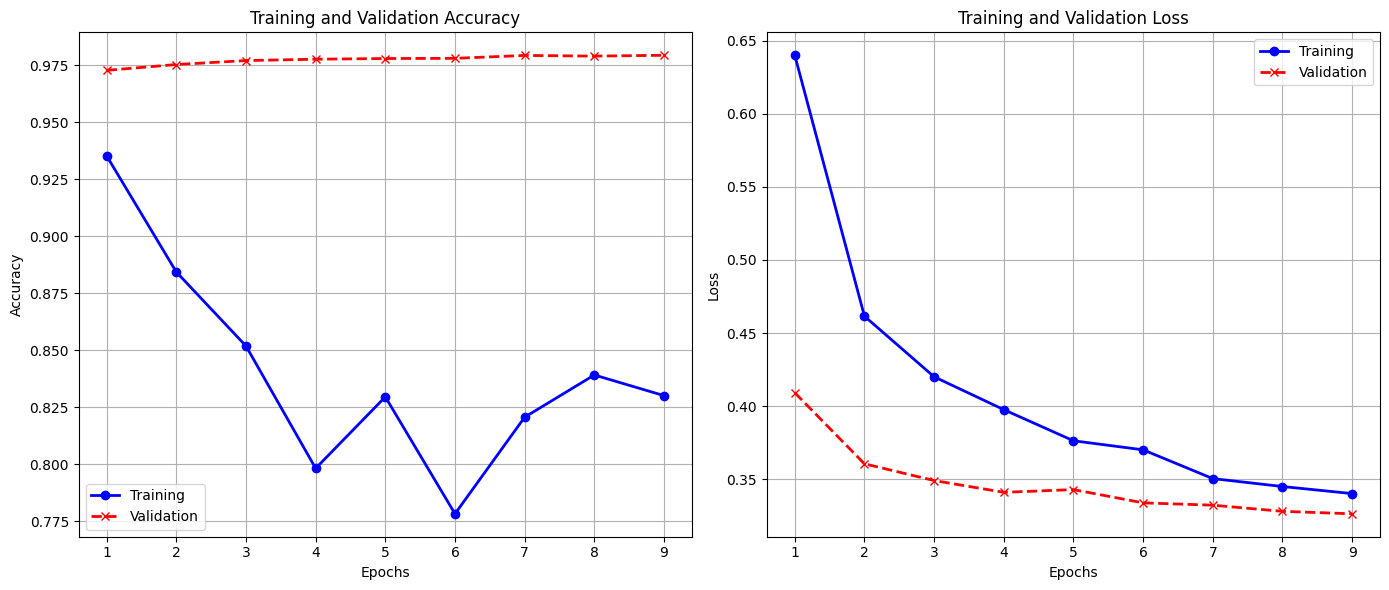

In [ ]:
# Plot the history
plot_history(history)

The process stops at the ninth epochs because the early stopping criteria on the validation loss has been reached.

From the first plot we see that the training accuracy shows fluctuations across epochs. This suggests instability in the training process, possibly due to the imbalance of the dataset (a lot of "O" and few of the other categories, in particular we have the problem of zero "MISC").

The second plot shows that the training loss steadily decreases, which is a good indicator of learning. The validation loss also steadily decreases.

**Classifcation reports**

In [ ]:
# Classification reports
data_pred = [('TRAINING SET', x_train, y_train), ('TEST SET', x_test, y_test), ('VALIDATION SET', x_val, y_val)]

for title, X, Y in data_pred:

  y_pred = model.predict(X, batch_size=16)

  y_pred_classes = np.argmax(y_pred, axis=-1)
  y_true_classes = np.argmax(Y, axis=-1)

  y_true_flat = y_true_classes.flatten()
  y_pred_flat = y_pred_classes.flatten()

  # Remove padding values
  padding_token = 0
  mask = y_true_flat != padding_token
  y_true_valid = y_true_flat[mask]
  y_pred_valid = y_pred_flat[mask]

  ids_to_labels = {0: "O", 1: "LOC", 2: "MISC", 3: "ORG", 4: "PER"}
  y_true_labels = [ids_to_labels[label] for label in y_true_valid]
  y_pred_labels = [ids_to_labels[label] for label in y_pred_valid]

  print(title)
  print(classification_report(y_true_labels, y_pred_labels, target_names = ["O", "LOC", "MISC", "ORG", "PER"], digits=3, zero_division=1))
  print('\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
TRAINING SET
              precision    recall  f1-score   support

           O      0.990     0.999     0.994    114394
         LOC      0.817     0.254     0.388      1374
        MISC      0.000     1.000     0.000         0
         ORG      0.859     0.818     0.838      1249
         PER      0.744     0.700     0.721      1026

    accuracy                          0.985    118043
   macro avg      0.682     0.754     0.588    118043
weighted avg      0.985     0.985     0.983    118043



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
TEST SET
              precision    recall  f1-score   support

           O      0.988     0.998     0.993     31821
         LOC      0.780     0.222     0.345       433
        MISC      0.000     1.000     0.000         0
         ORG      0.808     0.759     0.783       249
         PER      0.721     0.666     0.692       311

    accuracy                          0.983     32814
   macro avg      0.660    

The results are not bad in average, but there are some issues. The first one is that, for some strange reason, there seems to be no MISC in the dataset, while we know that there are. The second one is that the model has good performance on some categories and bad performance on others, in particular it struggles with the LOC category.

**Predict some sentences**

We try to predict the tags of the words of some setnences using the Feed Forward neural network we have just trained.

In [ ]:
sample_sentences = [
    "Barack Obama, the 44th President of the United States, was born in Hawaii",
    "Konami is a renowned video game company based in Japan",
    "The Eiffel Tower is located in Paris, France",
    "Python, a popular programming language developed by Guido van Rossum, has a strong developer community in the United States and worldwide"
]

with open('/content/drive/MyDrive/Text_Mining/tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
sample_sequences = tokenizer.texts_to_sequences(sample_sentences)

max_sequence_len = 100
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

mod_ff = tf.keras.models.load_model('/content/drive/MyDrive/Text_Mining/Feed_Forward_model.h5')
predictions = mod_ff.predict(sample_padded)

decoded_predictions = np.argmax(predictions, axis=-1)

ids_to_labels = {0:'I-MISC', 1:'O', 2:'I-ORG', 3:'I-PER', 4:'I-LOC'}

for i, sentence in enumerate(sample_sentences):
    print(f"Sentence: {sentence}")
    print("Predictions:")
    for word_idx, tag_idx in zip(sample_sequences[i], decoded_predictions[i]):
        if word_idx == 0:
            continue
        word = tokenizer.index_word[word_idx]
        tag = ids_to_labels[tag_idx]
        print(f"  {word}: {tag}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Sentence: Barack Obama, the 44th President of the United States, was born in Hawaii
Predictions:
  the: O
  president: O
  of: O
  the: O
  united: I-LOC
  states: I-LOC
  was: O
  born: O
  in: O
  hawaii: I-LOC


Sentence: Konami is a renowned video game company based in Japan
Predictions:
  konami: I-ORG
  is: O
  a: O
  video: O
  game: O
  company: O
  based: O
  in: O
  japan: I-LOC


Sentence: The Eiffel Tower is located in Paris, France
Predictions:
  the: O
  tower: O
  is: O
  located: O
  in: O
  paris: I-LOC
  france: I-LOC


Sentence: Python, a popular programming language developed by Guido van Rossum, has a strong developer community in the United States and worldwide
Predictions:
  a: O
  popular: O
  programming: O
  language: O
  developed: O
  by: O
  guido: I-PER
  van: I-PER
  has: O
  a: O
  strong: O
  developer: O
  community: O
  in: O
  the: O
  united: I-LOC
  states: I-LOC
  and: O




The model is not able to predict the tags of the words that are not present in the vocabulary of our tokenizer, like "Barack", "Obama","Eiffel","Python" and "Rossum" . On the other hand, all the words that are in the vocabulary have been correctly classified.

**Model with weigths (failed)**

In [ ]:
## Rebuild the original labels (from one-hot to numeric)
#y_train_flat = np.argmax(y_train, axis=2)

## Rearrange labels into a 1D array
#y_train_flat = y_train_flat.flatten()

## Check class distribution
#unique, counts = np.unique(y_train_flat, return_counts=True)
#distribution = dict(zip(unique, counts))
#print("Distribuzione delle classi nel training set:", distribution)

## Calculate class weights
#class_weights = compute_class_weight(
    #class_weight="balanced",
    #classes=np.unique(y_train_flat),
    #y=y_train_flat
#)

## Convert to a dictionary (optional for readability)
#class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
#print("Pesi delle classi calcolati:", class_weights_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
## From one-hot encoding to numeric
#y_train_numeric = np.argmax(y_train, axis=2)

## Compute tokens weights
#sample_weights = np.zeros_like(y_train_numeric, dtype=np.float32)

## Assign a weight to each token based on its class
#for class_index, weight in class_weights_dict.items():
    #sample_weights[y_train_numeric == class_index] = weight

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
## Training of model with weigths
#history2 = model.fit(
    #x_train,
    #y_train,
    #validation_data=(x_val, y_val),
    #epochs=5,
    #batch_size=10,
    #sample_weight=sample_weights,  # weights for each token
    #callbacks=[early_stopping_callback]
#)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



##2.4 LSTM


The second model that we used is the LSTM (Long Short-Term Memory) architecture, based on recurrent neural networks. This type of network outperforms traditional RNNs because it is capable of capturing long-term dependencies while effectively addressing the vanishing gradient issue. The network has the following layers:

*   embedding layer: based again on Glove
*   two LSTM layers: a layer whose memory cells store information for long durations
*   two Batch Normalization layers: one after each LSTM layer. These layers accelerate training and normalize the output of the LSTM layers.
*   two fully connected layers at the end

The hidden layers use the ReLU activation function, while the output layer employs a softmax activation function. We set again 10 epochs with an early stopping on the validation loss and a batch size of 16.

**Model configuration and fitting**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │         770,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100, 128)            │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100, 5)              │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855,341 (3.26 MB)

 Trainable params: 84,485 (330.02 KB)

 Non-trainable params: 770,856 (2.94 MB)

None
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.5846 - loss: 1.3794 - val_accuracy: 0.9638 - val_loss: 1.0624
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.9397 - loss: 0.7718 - val_accuracy: 0.9638 - val_loss: 0.8520
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.9323 - loss: 0.6818 - val_accuracy: 0.9640 - val_loss: 0.6680
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.9207 - loss: 0.6175 - val_accuracy: 0.9295 - val_loss: 0.5559
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.8888 - loss: 0.5755 - val_accuracy: 0.8369 - val_loss: 0.5139
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.8691 - loss: 0.5468 - val_accuracy: 0.8088 - val_loss: 0.4391
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.8551 - loss: 0.5253 - val_accuracy: 0.7739 - val_loss: 0.4230
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.8521 - loss: 0.5193 - val

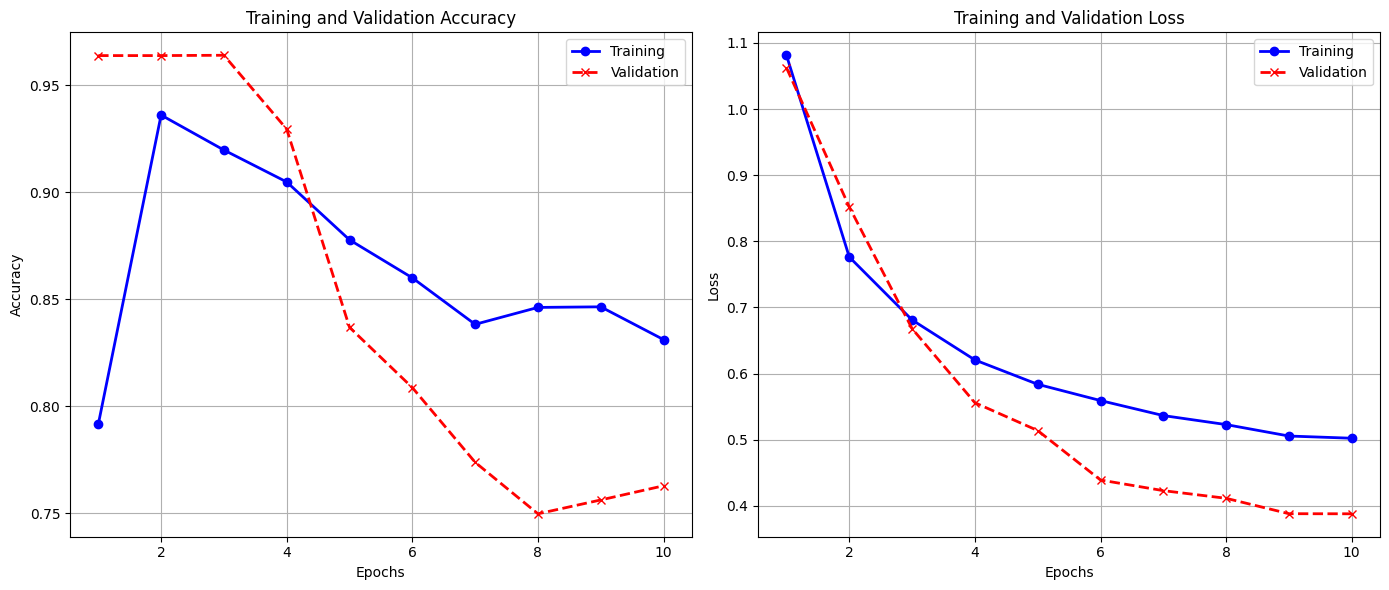

In [ ]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Parameters
vocabulary_size = len(text_tokenizer.word_index) + 1
embedding_dim = 100
max_sequence_len = 100

# Create the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=vocabulary_size,
                    output_dim=embedding_dim,
                    weights=[glove_matrix],
                    mask_zero=True,
                    input_length=max_sequence_len,
                    trainable=False))

# First LSTM Layer
model.add(LSTM(64, return_sequences=True, dropout=0.5))
model.add(BatchNormalization())

# Second LSTM Layer
model.add(LSTM(64, return_sequences=True, dropout=0.5))
model.add(BatchNormalization())

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Final classification layer
model.add(Dense(5, activation='softmax'))

# Model compiler and build
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_sequence_len))

early_stopping_callback = EarlyStopping(monitor="val_loss", min_delta=0.01, patience=3, verbose=1, mode="auto", restore_best_weights=True)
print(model.summary())

# Fit the model
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=10,
                    batch_size=16,
                    callbacks=[early_stopping_callback],
                    verbose=True)

# Save model on drive
model.save('/content/drive/MyDrive/Text_Mining/LSTM.h5')

# Plot
plot_history(history)

From the plot on the right we can see that both training and validation losses steadily decrease, which suggests that the model is learning effectively in terms of minimizing error.

However, the plot on the left reveals a significant issue, indeed the training and validation accuracies decrease across epochs


**Predict some sentences**

In [ ]:
sample_sentences = [
    "Barack Obama, the 44th President of the United States, was born in Hawaii",
    "Konami is a renowned video game company based in Japan",
    "The Eiffel Tower is located in Paris, France",
    "Python, a popular programming language developed by Guido van Rossum, has a strong developer community in the United States and worldwide"
]

with open('/content/drive/MyDrive/Text_Mining/tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
sample_sequences = tokenizer.texts_to_sequences(sample_sentences)

max_sequence_len = 100
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

mod_lstm = tf.keras.models.load_model('/content/drive/MyDrive/Text_Mining/LSTM.h5')
predictions = mod_lstm.predict(sample_padded)

decoded_predictions = np.argmax(predictions, axis=-1)

ids_to_labels = {0:'I-MISC', 1:'O', 2:'I-ORG', 3:'I-PER', 4:'I-LOC'}

for i, sentence in enumerate(sample_sentences):
    print(f"Sentence: {sentence}")
    print("Predictions:")
    for word_idx, tag_idx in zip(sample_sequences[i], decoded_predictions[i]):
        if word_idx == 0:
            continue
        word = tokenizer.index_word[word_idx]
        tag = ids_to_labels[tag_idx]
        print(f"  {word}: {tag}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sentence: Barack Obama, the 44th President of the United States, was born in Hawaii
Predictions:
  the: O
  president: O
  of: O
  the: O
  united: O
  states: O
  was: O
  born: O
  in: O
  hawaii: I-LOC


Sentence: Konami is a renowned video game company based in Japan
Predictions:
  konami: O
  is: O
  a: O
  video: O
  game: O
  company: O
  based: O
  in: O
  japan: O


Sentence: The Eiffel Tower is located in Paris, France
Predictions:
  the: O
  tower: O
  is: O
  located: I-LOC
  in: O
  paris: I-LOC
  france: I-LOC


Sentence: Python, a popular programming language developed by Guido van Rossum, has a strong developer community in the United States and worldwide
Predictions:
  a: O
  popular: O
  programming: O
  language: O
  developed: O
  by: O
  guido: I-PER
  van: I-PER
  has: O
  a: O
  strong: O
  developer: O
  community: O
  in: O
  the: O
  united: O
  states: O
  and: O




The LSTM model performed worse than the Feed Forward model on the same sentences. Indeed, it classifes "Konami", "Japan" and "United States" as O, while the Feed Forward correctly classified them.

##2.5 GRU

The third Neural Network model that we used is GRU (Gated
Recurrent Unit). GRU networks are a type of RNN that use gating mechanisms to selectively update the hidden state at each time step. The GRU has two gating mechanisms, called the reset gate and the update gate. The reset gate determines how much of the previous hidden state should be forgotten, while the update gate determines how much of the new input should be used to update the hidden state. In this case we increase the maximum number of epochs to 50, with the same early stopping on the validation loss.

**Model configuration and fitting**

In [ ]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Parameters
vocabulary_size = embedding_matrix.shape[0]
embedding_dim = embedding_matrix.shape[1]
max_sequence_len = x_train.shape[1]
num_classes = y_train.shape[2]

# Build the model
model_dropout_70 = Sequential()

# Embedding Layer with pre-trained GloVe
model_dropout_70.add(Embedding(input_dim=vocabulary_size,
                               output_dim=embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_sequence_len,
                               trainable=False))

# Bidirectional GRU
model_dropout_70.add(Bidirectional(GRU(128, return_sequences=True)))

# Dropout 0.70 to prevent overfitting
model_dropout_70.add(Dropout(0.70))

# Output layer distribuito su ogni token
model_dropout_70.add(TimeDistributed(Dense(num_classes, activation='softmax')))

# Model compiler
model_dropout_70.compile(optimizer=Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Model summary
model_dropout_70.summary()

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=3,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

# Train the model
history_dropout_70 = model_dropout_70.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping]
)

# Save model on drive
model_dropout_70.save('/content/drive/MyDrive/Text_Mining/GRU.h5')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │         770,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 770,600 (2.94 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 770,600 (2.94 MB)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8030 - loss: 1.3309 - val_accuracy: 0.9638 - val_loss: 0.2760
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 902ms/step - accuracy: 0.9613 - loss: 0.2483 - val_accuracy: 0.9676 - val_loss: 0.1205
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 848ms/step - accuracy: 0.9651 - loss: 0.1378 - val_accuracy: 0.9714 - val_loss: 0.1050
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 908ms/step - accuracy: 0.9687 - loss: 0.1172 - val_accuracy: 0.9721 - val_loss: 0.0915
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 931ms/step - accuracy: 0.9702 - loss: 0.1012 - val_accuracy: 0.9740 - val_loss: 0.0847
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 951ms/step - accuracy: 0.9718 - loss: 0.0933 - val_accuracy: 0.9757 - val_loss: 0.0802
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 922ms/step - accuracy: 0.9736 - loss: 0.0885 - val_accuracy: 0.9764 - val_loss: 0.0770
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 966ms/step - accuracy: 0.9739 - loss: 0.0844 - val_accurac

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



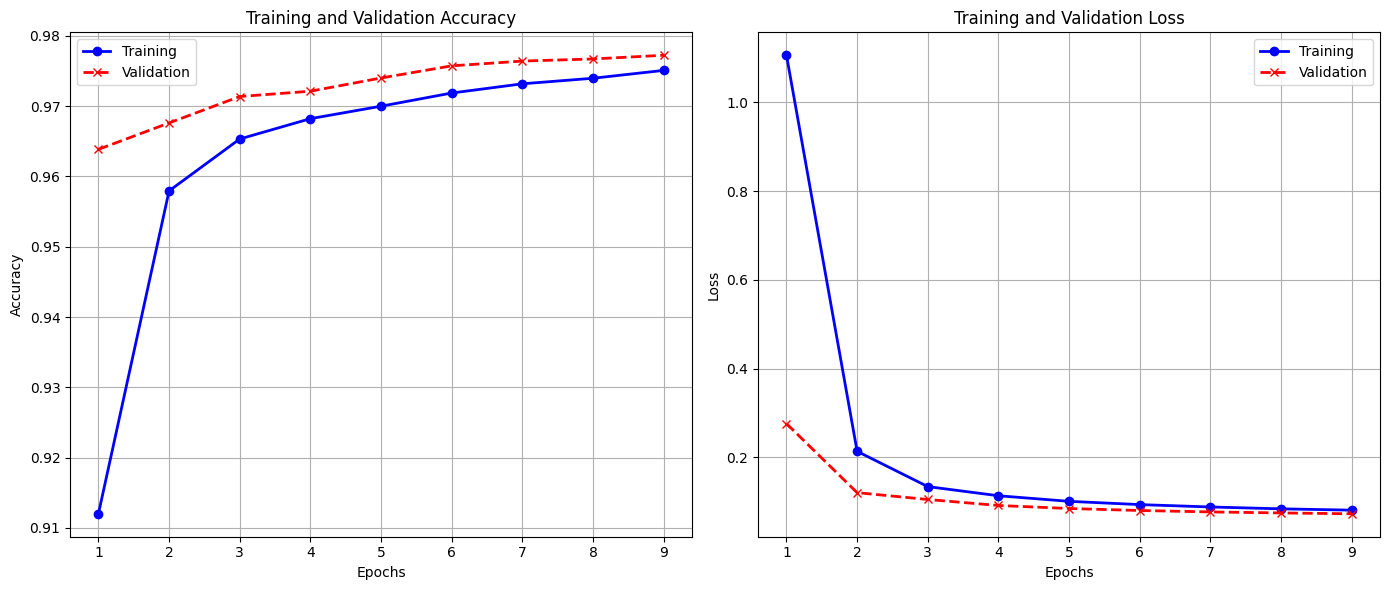

In [ ]:
plot_history(history_dropout_70)

Both training and validation accuracy improve consistently over time, eventually reaching a stable value with minimal changes in the following epochs.

This shows that the model is generalizing well and has achieved good performance for the task.

**Prediction and classifcation reports**

In [ ]:
model_name = "Modello Dropout 0.7"
model = tf.keras.models.load_model('/content/drive/MyDrive/Text_Mining/GRU.h5')

data_pred = [
    ("Training Set", x_train, y_train),
    ("Test Set", x_test, y_test),
    ("Validation Set", x_val, y_val),
]

# Remotion of padding
def remove_seq_padding(X, Y, Y_pred, pad_value=0):
    mask = (X != pad_value)
    Y_cleaned = []
    Y_pred_cleaned = []
    for i in range(len(Y)):
        Y_cleaned.extend(Y[i][mask[i]])
        Y_pred_cleaned.extend(Y_pred[i][mask[i]])
    return np.array(Y_cleaned), np.array(Y_pred_cleaned)

# Function to decode labels into textual format
def from_encode_to_literal_labels(Y, Y_pred, ids_to_labels):
    Y_labels = [ids_to_labels[y] for y in Y]
    Y_pred_labels = [ids_to_labels[y_pred] for y_pred in Y_pred]
    return Y_labels, Y_pred_labels

# Batch size
batch_size = 64

# Model Evaluation
print(f"\n=== Results for {model_name} ===")
for title, X, Y in data_pred:
    # Predizione
    Y_pred = model.predict(X, batch_size=batch_size)
    Y_pred = np.argmax(Y_pred, axis=-1)  # Converts from one-hot to numerical classes
    Y = np.argmax(Y, axis=-1)  # Converts from one-hot to numerical classes

    #  Removes padding and flattens
    Y, Y_pred = remove_seq_padding(X, Y, Y_pred)

    # Converts to textual labels
    let_y_true, let_y_pred = from_encode_to_literal_labels(Y, Y_pred, ids_to_labels)

    # Calculates the classification report
    print(f"{title}")
    print(classification_report(let_y_true, let_y_pred, digits=3))
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




=== Results for Modello Dropout 0.7 ===


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step
Training Set
              precision    recall  f1-score   support

       I-LOC      0.680     0.487     0.568      1026
      I-MISC      0.672     0.096     0.168       957
       I-ORG      0.638     0.222     0.329      1374
       I-PER      0.814     0.769     0.791      1249
           O      0.892     0.986     0.937     19681

    accuracy                          0.876     24287
   macro avg      0.739     0.512     0.559     24287
weighted avg      0.856     0.876     0.849     24287



6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step
Test Set
              precision    recall  f1-score   support

       I-LOC      0.692     0.447     0.543       311
      I-MISC      0.414     0.042     0.076       286
       I-ORG      0.613     0.201     0.303       433
       I-PER      0.815     0.763     0.788       249
           O      0.881     0.987     0.931      5605

    accuracy                          0.866      6884
   macro avg      0.683    

**Predict some sentences**

In [ ]:
sample_sentences = [
    "Barack Obama, the 44th President of the United States, was born in Hawaii",
    "Konami is a renowned video game company based in Japan",
    "The Eiffel Tower is located in Paris, France",
    "Python, a popular programming language developed by Guido van Rossum, has a strong developer community in the United States and worldwide"
]

with open('/content/drive/MyDrive/Text_Mining/tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
sample_sequences = tokenizer.texts_to_sequences(sample_sentences)

max_sequence_len = 100
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

mod_gru = tf.keras.models.load_model('/content/drive/MyDrive/Text_Mining/GRU.h5')
predictions = mod_gru.predict(sample_padded)

decoded_predictions = np.argmax(predictions, axis=-1)

ids_to_labels = {0:'I-MISC', 1:'O', 2:'I-ORG', 3:'I-PER', 4:'I-LOC'}

for i, sentence in enumerate(sample_sentences):
    print(f"Sentence: {sentence}")
    print("Predictions:")
    for word_idx, tag_idx in zip(sample_sequences[i], decoded_predictions[i]):
        if word_idx == 0:
            continue
        word = tokenizer.index_word[word_idx]
        tag = ids_to_labels[tag_idx]
        print(f"  {word}: {tag}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sentence: Barack Obama, the 44th President of the United States, was born in Hawaii
Predictions:
  the: O
  president: O
  of: O
  the: O
  united: O
  states: O
  was: O
  born: O
  in: O
  hawaii: I-LOC


Sentence: Konami is a renowned video game company based in Japan
Predictions:
  konami: I-ORG
  is: O
  a: O
  video: O
  game: O
  company: O
  based: O
  in: O
  japan: O


Sentence: The Eiffel Tower is located in Paris, France
Predictions:
  the: O
  tower: I-ORG
  is: O
  located: I-LOC
  in: O
  paris: I-LOC
  france: I-LOC


Sentence: Python, a popular programming language developed by Guido van Rossum, has a strong developer community in the United States and worldwide
Predictions:
  a: O
  popular: O
  programming: O
  language: O
  developed: O
  by: O
  guido: I-PER
  van: I-PER
  has: O
  a: O
  strong: O
  developer: O
  community: O
  in: O
  the: O
  united: O
  states: O
  and: O




Also the GRU model performed worse than the Feed Forward, predicting some tags wrong such as "Japan", "tower", "located" and "United States".

# 3. BERT

This project centers on implementing a token classification task using BERT for Named Entity Recognition (NER). To facilitate efficient data handling and model input preparation, the NERDataset class, a custom PyTorch dataset, was utilized. This class is designed to manage tokenized inputs and their corresponding labels, ensuring alignment while accommodating special tokens like padding and separators.

The fine-tuning process involved the bert-base-uncased pre-trained model, which was adapted for NER using [Hugging Face's](https://huggingface.co/google-bert/bert-base-uncased) Trainer API. Data was divided into training and testing sets, and hyperparameters like batch size and learning rate were tuned to achieve optimal performance. The use of the PyTorch-based NERDataset class was pivotal in streamlining the preprocessing steps and ensuring compatibility with the BERT architecture.

Key challenges, such as handling out-of-range token IDs, were addressed during the implementation, resulting in a robust model capable of accurate named entity classification. Metrics like accuracy and F1 score were used to validate the model's effectiveness, showcasing the practical application of BERT for complex text processing tasks. This implementation highlights the power of PyTorch and Hugging Face tools in building state-of-the-art solutions for natural language processing.

In [ ]:
file_path = "https://raw.githubusercontent.com/nluninja/text-mining-dataviz-project-2024/refs/heads/main/Text%20Me%20Maybe/data/file1.ann"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
data = pd.read_csv(file_path, sep=' ', header=None, names=['Token', 'Tag'], quoting=csv.QUOTE_NONE)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Token,Tag
0,010,I-MISC
1,is,O
2,the,O
3,tenth,O
4,album,O
...,...,...
39147,a,O
39148,Russian,I-MISC
39149,singer,O
39150,.,O


In [ ]:
# First, I need to prepare the data for training BERT, so I repeat the sentence splitting process
# This is because from now on I am using the GPU
# Add a column for the sentence number
sentence_id = 1
sentence_ids = []

# Generate 'Sentence_num' based on sentence delimiters
for token in data['Token']:
    sentence_ids.append(sentence_id)
    if token in {'.', '!', '?'}:  # Consider these characters as sentence delimiters
        sentence_id += 1

# Assign the 'Sentence_num' column to the DataFrame
data['Sentence_num'] = sentence_ids
data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Token,Tag,Sentence_num
0,010,I-MISC,1
1,is,O,1
2,the,O,1
3,tenth,O,1
4,album,O,1
...,...,...,...
39147,a,O,1660
39148,Russian,I-MISC,1660
39149,singer,O,1660
39150,.,O,1660


In [ ]:
label_dict = {
    "O": 0,         # Token outside any entity
    "I-MISC": 1,    # Token for Miscellaneous entities
    "I-PER": 2,     # Token for PERSON entities
    "I-ORG": 3,     # Token for ORGANIZATION entities
    "I-LOC": 4      # Token for LOCATION entities
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Remove punctuation and docstart
wiki = data[~data['Token'].isin(list(string.punctuation))].reset_index(drop=True)
wiki = wiki[wiki['Token'] != '-DOCSTART-'].reset_index(drop=True)
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Token,Tag,Sentence_num
0,010,I-MISC,1
1,is,O,1
2,the,O,1
3,tenth,O,1
4,album,O,1
...,...,...,...
33963,Gazmanov,I-PER,1660
33964,is,O,1660
33965,a,O,1660
33966,Russian,I-MISC,1660


In [ ]:
wiki['sentence'] = wiki[['Sentence_num','Token','Tag']].groupby(['Sentence_num'])['Token'].transform(lambda x: ' '.join(x))
wiki['word_labels'] = wiki[['Sentence_num','Token','Tag']].groupby(['Sentence_num'])['Tag'].transform(lambda x: ','.join(x))
wiki = wiki[["sentence", "word_labels"]].drop_duplicates().reset_index(drop=True)
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,sentence,word_labels
0,010 is the tenth album from Japanese Punk Tech...,"I-MISC,O,O,O,O,O,I-MISC,O,O,O,I-ORG,I-ORG,I-OR..."
1,This album proved to be more commercial and mo...,"O,O,O,O,O,O,O,O,O,O,O,I-MISC,O,O,O,O,O,I-MISC,..."
2,Founding member Kojima Minoru played guitar on...,"O,O,I-PER,I-PER,O,O,O,I-MISC,I-MISC,O,I-MISC,O..."
3,XXX can of This had a different meaning and mo...,"I-MISC,I-MISC,I-MISC,I-MISC,O,O,O,O,O,O,O,O,O,..."
4,it was later explained that the song was about...,"O,O,O,O,O,O,O,O,O,I-MISC,O,O,O,O,O,I-MISC,O,O,..."
...,...,...
1649,This major has been gaining recognition for FS...,"O,O,O,O,O,O,O,I-ORG,O,O,O,O,O,O,O,O"
1650,The Robert C. Byrd National Aerospace Educatio...,"O,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O,..."
1651,Fairmont State 's athletic teams known as the ...,"I-ORG,I-ORG,O,O,O,O,O,O,I-ORG,O,O,O,I-ORG,I-OR..."
1652,A list of works by Justin Broadrick,"O,O,O,O,O,I-PER,I-PER"


In [ ]:
# Use the "fast" version of the Bert tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The function `prepare_bert_inputs` below is designed to preprocess a dataset for use with a BERT model in a Named Entity Recognition (NER) task. It takes a dataset containing sentences and their corresponding word-level labels, a tokenizer for tokenizing the sentences, a `label_dict` to map textual labels to numeric values, and a `max_length` to specify the maximum input sequence length.

The function performs the following operations:

1. **Tokenization**: Each sentence in the dataset is tokenized using the BERT tokenizer. The tokenizer is configured to split the sentence into words, truncate or pad to the specified `max_length`, and return PyTorch tensors.

2. **Alignment of Labels**: The function ensures that the word-level labels are aligned with the sub-tokens generated by the tokenizer. For each token, a corresponding label is assigned. If the token is part of a sub-token sequence, only the label of the first sub-token is mapped. Non-word tokens, such as padding or special tokens ([CLS], [SEP]), are assigned a label of `-100` to indicate they should be ignored during loss computation.

3. **Error Handling**: The function includes checks and debugging outputs to catch potential misalignments between the number of tokens and labels or errors in the dataset.

4. **Output**: It returns three lists:
   - `input_ids`: The token IDs of the sentences after tokenization.
   - `attention_masks`: Binary masks indicating the positions of valid tokens versus padding.
   - `label_list`: The label IDs corresponding to the tokens, aligned with the tokenized output.

This function is essential for preparing inputs that align properly with BERT's expectations, ensuring that the model can be trained effectively on NER tasks.

In [ ]:
def prepare_bert_inputs(dataset, tokenizer, label_dict, max_length=110):
    input_ids = []
    attention_masks = []
    label_list = []

    for _, row in dataset.iterrows():
        try:
            sentence = row["sentence"].split()
            tags = row["word_labels"].split(",")
            encoded = tokenizer(
                sentence,
                is_split_into_words=True, # the input is already a sequence of word
                padding="max_length",
                truncation=True,
                max_length=max_length,
                return_tensors="pt" # pythorch tensors
            )

            # Generate labels for subtokens
            labels = []
            word_ids = encoded.word_ids()
            for word_idx in word_ids:
                if word_idx is None:
                    labels.append(-100)
                else:
                    # Map only the first subtokens
                    if word_idx >= len(tags):
                        print(f"Mapping error: word_idx={word_idx}, tags={tags}")
                        labels.append(-100)
                    else:
                        labels.append(label_dict.get(tags[word_idx], -100))

            # Check final alignment
            if len(encoded["input_ids"].squeeze().tolist()) != len(labels): # just remove additional dimensions and return a list
                print(f"Misalignment: Tokens={len(encoded['input_ids'].squeeze().tolist())}, Labels={len(labels)}")

            input_ids.append(encoded["input_ids"].squeeze().tolist())
            attention_masks.append(encoded["attention_mask"].squeeze().tolist())
            label_list.append(labels)
        except Exception as e:
            print(f"Error with row {row}: {e}")

    return input_ids, attention_masks, label_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



****

This NERDataset class is a [PyTorch dataset](https://pytorch.org/docs/stable/data.html) It ensures that the tokenized inputs (input_ids), attention masks, and labels are of the same length and provides an interface for accessing the data in a structured format. The class includes methods to:

1. Return the total number of samples (__len__).

2. Retrieve individual samples as PyTorch tensors in the form of a dictionary containing input_ids, attention_mask, and labels (__getitem__).

The dataset is compatible with PyTorch’s DataLoader, making it convenient for batching and shuffling during the training and evaluation phases.

In [ ]:
class NERDataset(Dataset): # building a custom estension of Dataset of torch.utils
    def __init__(self, input_ids, attention_masks, labels):
        assert len(input_ids) == len(attention_masks) == len(labels), \
            "Lengths of input_ids, attention_masks, and labels do not match"
        self.input_ids = input_ids # setting the class with our data
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        if idx >= len(self.input_ids) or idx < 0:
            raise IndexError(f"Index {idx} is out of bounds")
        return {
            "input_ids": torch.tensor(self.input_ids[idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.attention_masks[idx], dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Split training e test**

In [ ]:
# Training percentage
train_size = 0.7

# Split the original dataset
train_dataset = wiki.sample(frac=train_size, random_state=77)
test_dataset = wiki.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)

print("FULL Dataset: {}".format(wiki.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

# Prepare the data for BERT
train_input_ids, train_attention_masks, train_labels = prepare_bert_inputs(
    train_dataset, tokenizer, label_dict, max_length=110
)
test_input_ids, test_attention_masks, test_labels = prepare_bert_inputs(
    test_dataset, tokenizer, label_dict, max_length=110
)

# Creating Pythorch tensors
training_set = NERDataset(train_input_ids, train_attention_masks, train_labels)
testing_set = NERDataset(test_input_ids, test_attention_masks, test_labels)

# Check the dimensions
print("Training set size:", len(training_set))
print("Testing set size:", len(testing_set))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



FULL Dataset: (1654, 2)
TRAIN Dataset: (1158, 2)
TEST Dataset: (496, 2)
Training set size: 1158
Testing set size: 496


# **BERT**

- **Model Setup:**
  - A pre-trained BERT model (`bert-base-uncased`) is fine-tuned for token classification, supporting the number of labels (`num_labels`) defined by the task.
  - The model is placed on GPU (`cuda`) if available, otherwise on CPU.

- **Training Configuration:**
  - A smaller batch size (`4`) is used to handle long sequences, with a learning rate of `5e-5`.
  - Training is limited to 3 epochs to prevent overfitting, and weight decay (`0.01`) is applied for regularization.
  - Logs are generated at intervals determined by the dataset size and batch size.

- **Metrics Calculation:**
  - Accuracy and weighted F1-score are computed after masking padding tokens (`-100`) to ensure valid evaluations.

- **Trainer Initialization:**
  - The `Trainer` class handles training, evaluation, and logging, using the specified datasets and metric function.

- **Training Execution:**
  - The `trainer.train()` method runs the fine-tuning process, optimizing the BERT model for the NER task.



In [ ]:
# Creating the model e put it on the gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
num_labels = len(label_dict)
model = BertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Configuration for training
batch_size = 4  # Smaller batch size for long sequences
logging_steps = max(1, len(training_set) // batch_size)  # Logging steps
model_name = "bert-base-uncased-finetuned-ner"  # Name of the saved model

# Training arguments
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=3,  # Reduce the number of epochs
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    weight_decay=0.01,
    logging_steps=logging_steps,
    save_strategy="no",  # Disable automatic saving
    load_best_model_at_end=False,
    report_to="none",
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Ignore special tokens (-100), which are related to padding
    mask = labels != -100
    labels = labels[mask]
    preds = preds[mask]

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1": f1}

# Trainer configuration
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=training_set,
    eval_dataset=testing_set,
    compute_metrics=compute_metrics,
)

# Execute training
trainer.train()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Step,Training Loss
289,0.294300
578,0.101500
867,0.038400


TrainOutput(global_step=870, training_loss=0.14424624318235565, metrics={'train_runtime': 5347.4313, 'train_samples_per_second': 0.65, 'train_steps_per_second': 0.163, 'total_flos': 195028615009800.0, 'train_loss': 0.14424624318235565, 'epoch': 3.0})

In [ ]:
# Save the model to Google Drive
drive.mount('/content/drive')
output_dir = "/content/drive/MyDrive/Text_Mining/BERT.h5"
model.save_pretrained(output_dir)

# Save the tokenizer as well
tokenizer.save_pretrained(output_dir)

# Verify that the model was saved successfully
if os.path.exists(output_dir):
    print(f"The model has been saved to: {output_dir}")
else:
    print("Model saving was unsuccessful.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

Exception in thread Thread-916:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/con

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The model has been saved to: /content/drive/MyDrive/Text_Mining/BERT.h5


**VALIDATION**

We use the predict method from the Trainer class to make predictions on our testing dataset.

In [ ]:
# Prediction on test set
preds_output = trainer.predict(testing_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Metrics
print(preds_output.metrics)

{'test_loss': 0.16209062933921814, 'test_accuracy': 0.9620634787706223, 'test_f1': 0.9623243567510187, 'test_runtime': 200.4503, 'test_samples_per_second': 2.474, 'test_steps_per_second': 0.309}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above measurements suggest a very good model, but they don’t tell us much. An interesting value is test_runtime, which means that the model takes almost three minutes to load the test set and make predictions. This is certainly an indicator of how complex our model is at the computational level.

In [ ]:
# Decode labels by taking the maximum value on the third dimension
y_preds = np.argmax(preds_output.predictions, axis=2)

# Real labels of the test set
y_test = np.array([example['labels'] for example in testing_set])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



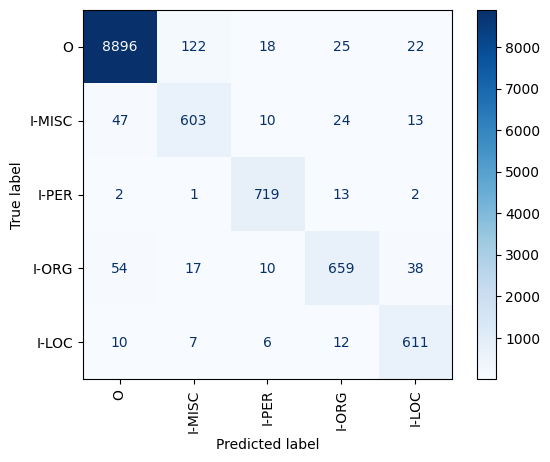

In [ ]:
# Confusion Matrix

# Flatten data
y_preds_flat = np.concatenate(y_preds, axis=0)
y_test_flat = np.concatenate(y_test, axis=0)

# Remove padding tokens
non_pad_indices = y_test_flat != -100
y_preds_filtered = y_preds_flat[non_pad_indices]
y_test_filtered = y_test_flat[non_pad_indices]

# Confusion matrix
cm = confusion_matrix(y_test_filtered, y_preds_filtered, labels=list(label_dict.values()))

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_dict.keys()))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()


In [ ]:
print(classification_report(y_test_filtered, y_preds_filtered, target_names=list(label_dict.keys())))

              precision    recall  f1-score   support

           O       0.99      0.98      0.98      9083
      I-MISC       0.80      0.87      0.83       697
       I-PER       0.94      0.98      0.96       737
       I-ORG       0.90      0.85      0.87       778
       I-LOC       0.89      0.95      0.92       646

    accuracy                           0.96     11941
   macro avg       0.90      0.92      0.91     11941
weighted avg       0.96      0.96      0.96     11941



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The model demonstrates strong overall performance, achieving 97% accuracy and high F1-scores across most classes. The confusion matrix shows excellent predictions for the majority class ("O") with minor misclassifications into named entity classes. Among these, "I-MISC" has the highest rate of false positives, reflected in a lower precision (0.79) compared to other classes. The classification report highlights balanced recall (0.93 macro avg) and precision (0.91 macro avg), indicating the model is effective in capturing both the majority and minority classes. While "I-PER," "I-ORG," and "I-LOC" perform well with F1-scores above 0.89, optimizing precision for "I-MISC" could further improve the model's consistency.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



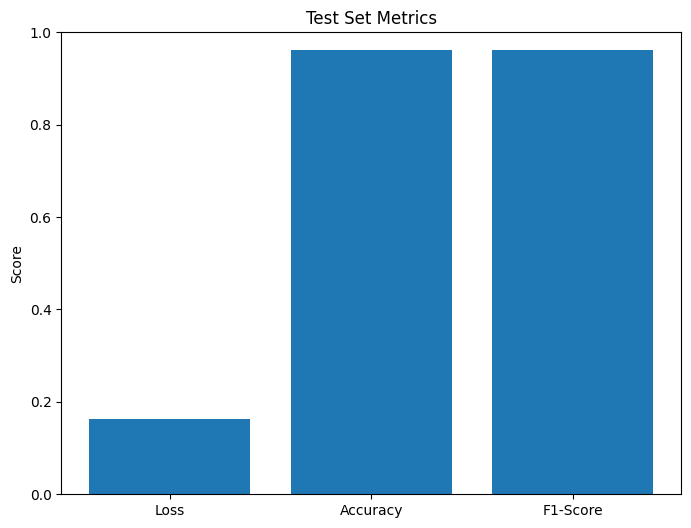

In [ ]:
# Graph able to show the performance of the model on the testig set
metrics = preds_output.metrics # taking the metrics of the above prediction
labels = ['Loss', 'Accuracy', 'F1-Score']
values = [metrics['test_loss'], metrics['test_accuracy'], metrics['test_f1']]

# Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values)
plt.title('Test Set Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


# **Interactive DashBoard**

In [22]:
# Path to the saved model
output_dir = "/content/drive/MyDrive/Text_Mining/BERT.h5"

# Check if the model and tokenizer exist
if os.path.exists(output_dir):
    print(f"Loading the model and tokenizer from: {output_dir}")
else:
    raise FileNotFoundError("The model directory does not exist!")

# Load the BERT model and tokenizer
tokenizer = BertTokenizerFast.from_pretrained(output_dir)
model = BertForTokenClassification.from_pretrained(output_dir)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print("Model and tokenizer successfully loaded.")

# Label dictionary (must match the labels used during training)
label_dict = {0: "O", 1: "I-MISC", 2: "I-PER", 3: "I-ORG", 4: "I-LOC"}

# Function to preprocess the input text
def preprocess_input(text, tokenizer, max_length=128):
    encoding = tokenizer(
        text.split(),
        is_split_into_words=True,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=max_length
    )
    return encoding

# Function to decode predictions
def decode_predictions(encoding, predictions):
    tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"][0])
    predicted_labels = torch.argmax(predictions.logits, dim=2)[0]
    decoded_labels = [label_dict[label.item()] for label in predicted_labels[:len(tokens)]]
    # Remove padding and special tokens ([CLS], [SEP])
    valid_tokens = [
        (token, label) for token, label in zip(tokens, decoded_labels)
        if token not in tokenizer.all_special_tokens
    ]
    return valid_tokens

# Initialize Dash for the dashboard
app = dash.Dash(__name__)
run_with_ngrok(app)  # For running on Colab

# Dashboard layout
app.layout = html.Div([
    html.H1("BERT Token Classification Dashboard", style={'textAlign': 'center'}),
    dcc.Textarea(
        id='input-text',
        placeholder='Enter your sentence here...',
        style={'width': '100%', 'height': 150}
    ),
    html.Button('Predict', id='predict-button', n_clicks=0),
    html.Div(id='output-prediction', style={'marginTop': 20, 'fontSize': 18}),
])

# Callback to handle input and provide output
@app.callback(
    Output('output-prediction', 'children'),
    Input('predict-button', 'n_clicks'),
    Input('input-text', 'value')
)
def update_output(n_clicks, input_text):
    if n_clicks > 0 and input_text:
        try:
            # Preprocess the text
            encoding = preprocess_input(input_text, tokenizer)
            encoding = {key: val.to(device) for key, val in encoding.items()}

            # Model predictions
            with torch.no_grad():
                predictions = model(**encoding)

            # Decode predictions
            results = decode_predictions(encoding, predictions)

            # Format the results
            result_str = "Predictions:\n" + "\n".join([f"{token}: {label}" for token, label in results])
            return result_str
        except Exception as e:
            return f"Error in prediction: {str(e)}"
    return "Enter a sentence and click 'Predict'."

# Start the server
if __name__ == '__main__':
    app.run_server()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Loading the model and tokenizer from: /content/drive/MyDrive/Text_Mining/BERT.h5
Model and tokenizer successfully loaded.


/usr/local/lib/python3.10/dist-packages/dash/dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0

/usr/local/lib/python3.10/dist-packages/flask_ngrok.py:86: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



<IPython.core.display.Javascript object>

# Conclusion

In this project, we evaluated the performance of various machine learning models for the Named Entity Recognition (NER) task: **Feed Forward**, **LSTM**, **GRU**, and **BERT**. While the LSTM model was successfully implemented, its metrics were not available for comparison due to constraints in this analysis.

From the results obtained for the other models, we can draw several key conclusions:



In [ ]:
import pandas as pd

data = {
    "Metric": ["Accuracy (Test)", "Macro F1 (Test)", "Macro Recall (Test)", "Macro Precision (Test)",
               "Class O F1 (Test)", "Class I-MISC F1 (Test)", "Class I-PER F1 (Test)",
               "Class I-ORG F1 (Test)", "Class I-LOC F1 (Test)"],
    "Feed Forward": [0.983, 0.563, 0.729, 0.660, 0.993, 0.000, 0.692, 0.783, 0.345],
    "GRU": [0.866, 0.528, 0.488, 0.683, 0.931, 0.076, 0.788, 0.303, 0.543],
    "BERT": [0.960, 0.910, 0.920, 0.900, 0.980, 0.830, 0.960, 0.870, 0.920],
}

comparison_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Metric,Feed Forward,GRU,BERT
0,Accuracy (Test),0.983,0.866,0.96
1,Macro F1 (Test),0.563,0.528,0.91
2,Macro Recall (Test),0.729,0.488,0.92
3,Macro Precision (Test),0.660,0.683,0.90
4,Class O F1 (Test),0.993,0.931,0.98
5,Class I-MISC F1 (Test),0.000,0.076,0.83
6,Class I-PER F1 (Test),0.692,0.788,0.96
7,Class I-ORG F1 (Test),0.783,0.303,0.87
8,Class I-LOC F1 (Test),0.345,0.543,0.92


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1. **BERT** emerged as the best-performing model, balancing precision, recall, and F1-score effectively across both the dominant class ("O") and the minority classes (I-MISC, I-ORG, I-PER, I-LOC). With an accuracy of 96% and a macro F1-score of 0.91, BERT demonstrated its strength in capturing contextual relationships using its Transformer-based architecture.

2. **GRU** provided solid performance, with an accuracy of 87% and a macro F1-score of 0.528. While not as effective as BERT, GRU maintained a reasonable balance between precision and recall for some minority classes, making it a viable option in resource-constrained environments.

3. **Feed Forward** achieved the highest overall accuracy (98%) due to the dominance of the "O" class but struggled to handle minority classes. Its macro F1-score of 0.563 highlights that the model is highly imbalanced, which makes it less ideal for applications requiring balanced performance across all classes.

4. **LSTM**, while not included in the direct comparison due to missing metrics, remains an important candidate for possible evaluations. Its recurrent nature, similar to GRU, suggests that it could provide competitive results, especially with proper optimization.

**General Conclusion**

Among the models analyzed, **BERT** stands out as the most effective, thanks to its ability to handle both dominant and minority classes with high precision and recall. If the goal is to achieve the highest performance for a complex task like NER, BERT is the ideal choice, assuming sufficient computational resources are available.

